# Flight Price Prediction

## 1. Import Libraries and Load Data

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Load the dataset
data_path = 'C:\\Users\\us\\Downloads\\Clean_Dataset.csv'
data = pd.read_csv(data_path)

# Display the first 5 rows of the dataset and get the shape and basic info

data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## 2. Explore the Data

In [29]:
data.shape # The data has 300153 rows and 12 columns

(300153, 12)

In [30]:
data.columns #column names

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [31]:
data.info() # Get some informations on columns like Number of non null values and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [32]:
# Check for missing values
data.isnull().sum() # Our data doesn't have any missing value.

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [33]:
data.describe() # Descriptive analysis for numeric variables

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [34]:
data.describe(include = ['O']) # Descriptive analysis for categorical variables

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


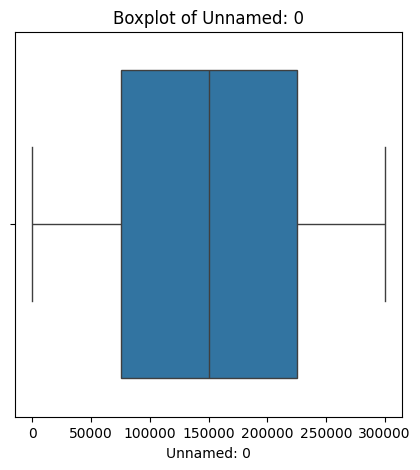

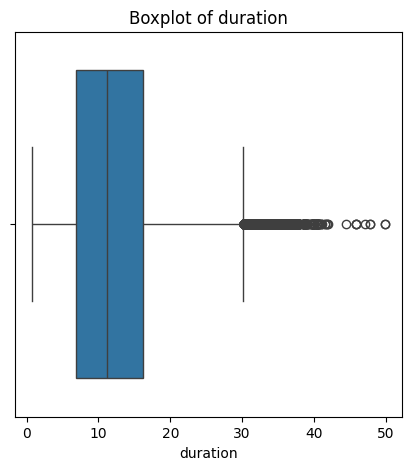

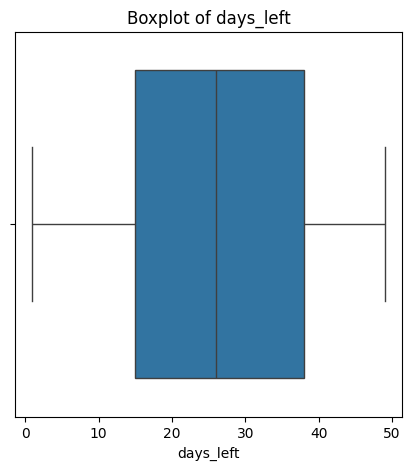

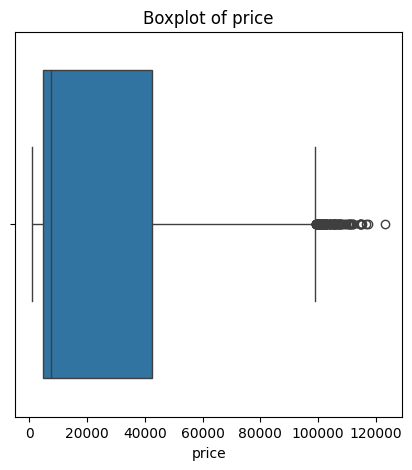

In [35]:
# Check for outliers
# Select only numeric columns for boxplot visualization
numeric_cols = data.select_dtypes(include=[np.number])

# Plotting boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(5, 5))  
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}') 
    plt.show()
#--------------------------------> duration and price contain some outliers <-------------------------------------#

## 3. Modify the Data

In [36]:
# Removing unnecessary columns
data = data.drop(['Unnamed: 0'], axis=1)

In [37]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [38]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [39]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return only data within the IQR boundaries
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

data_cleaned = remove_outliers(data, 'price')
data_cleaned = remove_outliers(data_cleaned, 'duration')

# Display the head of the cleaned data
data_cleaned.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [40]:
data_cleaned.shape

(297920, 11)

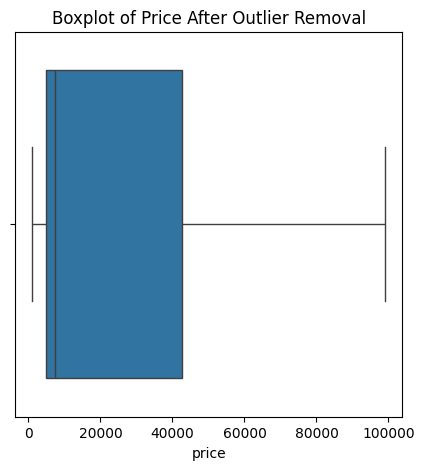

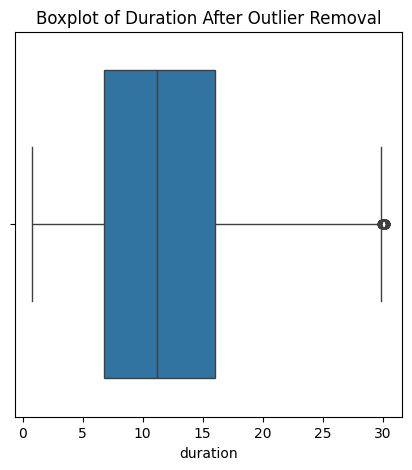

In [41]:
# Checking the effect of removing outliers by displaying boxplots again
plt.figure(figsize=(5, 5))
sns.boxplot(x=data_cleaned['price'])
plt.title('Boxplot of Price After Outlier Removal')
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x=data_cleaned['duration'])
plt.title('Boxplot of Duration After Outlier Removal')
plt.show()


## 4. Visualizations

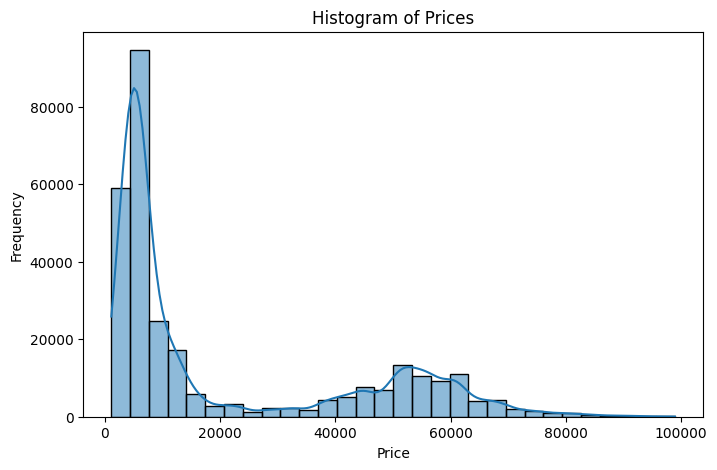

In [42]:
# Histogram - Distribution of Prices
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['price'], bins=30, kde=True)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

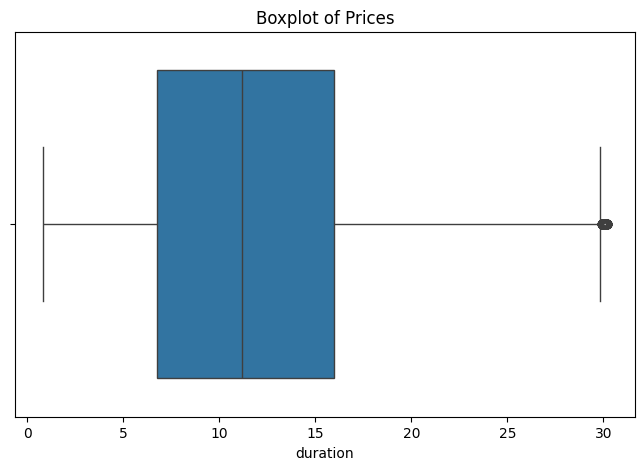

In [43]:
# Boxplot - Prices to Identify Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_cleaned['duration'])
plt.title('Boxplot of Prices')
plt.show()


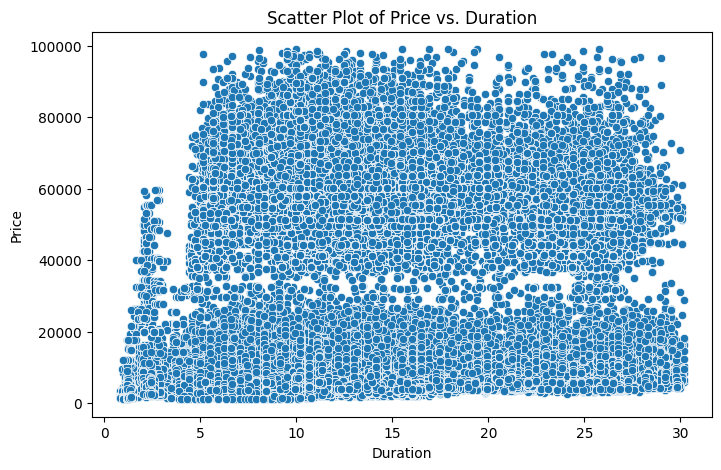

In [44]:
# Scatter Plot - Price vs. Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='duration', y='price', data=data_cleaned)
plt.title('Scatter Plot of Price vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

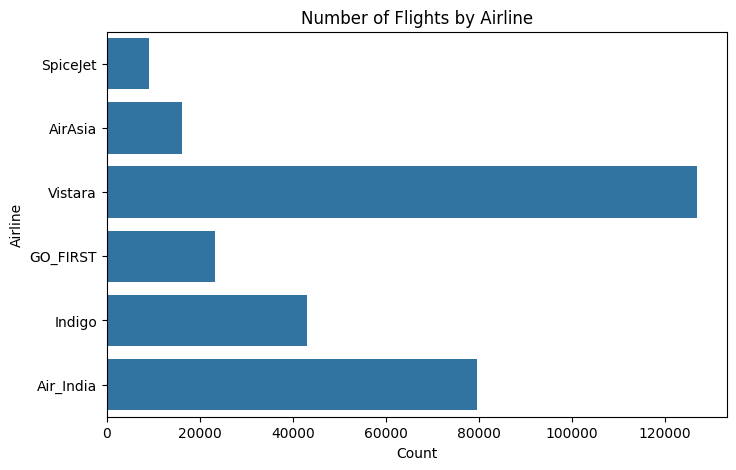

In [45]:
# Count Plot - Number of Flights by Airline
plt.figure(figsize=(8, 5))
sns.countplot(y='airline', data=data_cleaned)
plt.title('Number of Flights by Airline')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()


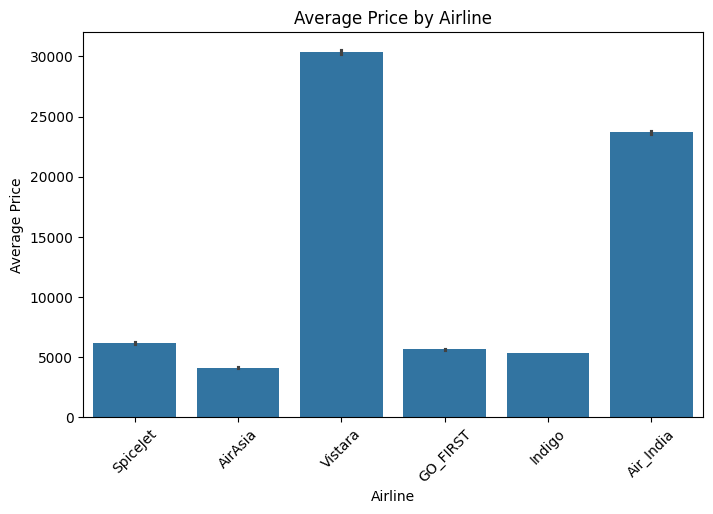

In [46]:
# Bar Plot - Average Price by Airline
plt.figure(figsize=(8, 5))
sns.barplot(x='airline', y='price', data=data_cleaned, estimator=np.mean)
plt.title('Average Price by Airline')
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()


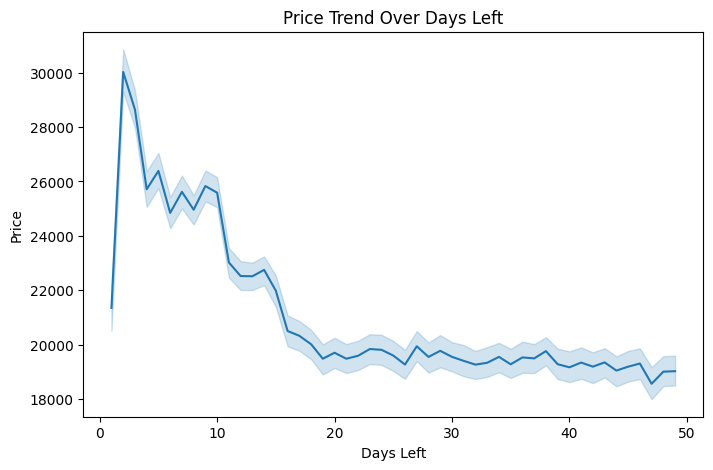

In [47]:
# Line Plot - Price Trend Over Days Left
plt.figure(figsize=(8, 5))
sns.lineplot(x='days_left', y='price', data=data_cleaned)
plt.title('Price Trend Over Days Left')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()


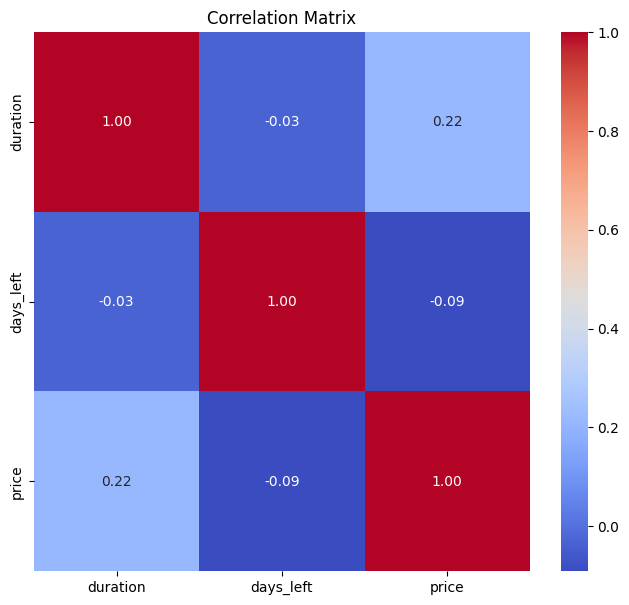

In [54]:
# Heatmap - Correlation Matrix
numeric_data = data_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


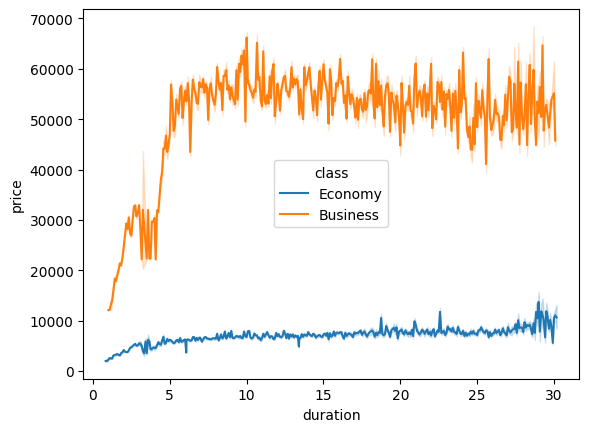

In [49]:
# Lineplot -
sns.lineplot(data=data_cleaned,x='duration',y='price',hue='class')
plt.show()

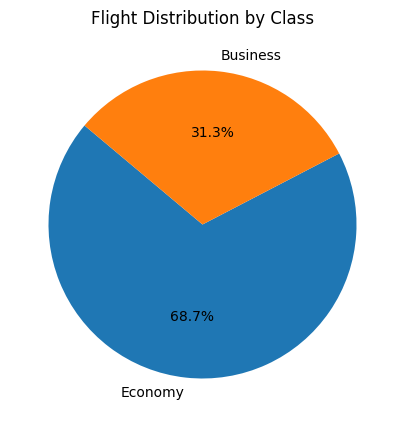

In [50]:
# Pie Chart - Flight Distribution by Class
class_counts = data_cleaned['class'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Flight Distribution by Class')
plt.show()


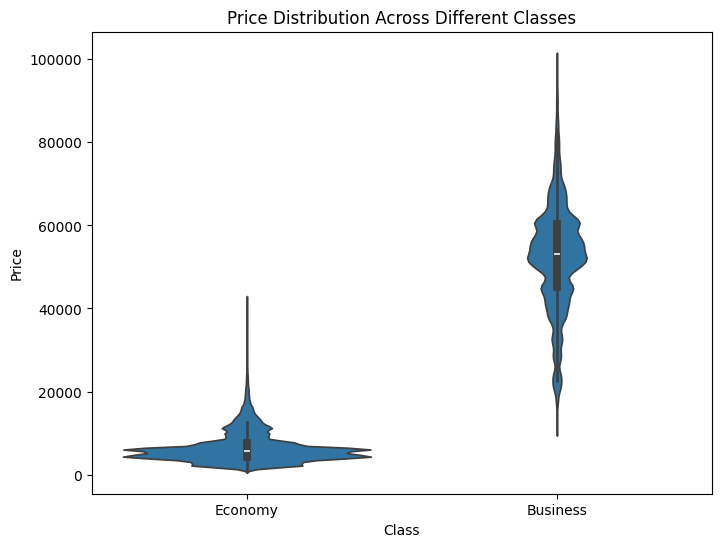

In [51]:
#  Violin Plot - Price Distribution Across Different Classes
plt.figure(figsize=(8, 6))
sns.violinplot(x='class', y='price', data=data_cleaned)
plt.title('Price Distribution Across Different Classes')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

##  5. Build a Regression Model

In [52]:
# categorical and numerical features
categorical_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
numerical_features = ['duration', 'days_left']  

# preprocessor with OneHotEncoder for categorical data and StandardScaler for numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# pipeline that first preprocesses the data and then fits a linear regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Split the data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output metrics
print(f'Training MSE: {train_mse}')
print(f'Training R2: {train_r2}')
print(f'Test MSE: {test_mse}')
print(f'Test R2: {test_r2}')

Training MSE: 45591331.050791666
Training R2: 0.911492578068169
Test MSE: 45720767.81234383
Test R2: 0.9113048689418509
